In [24]:
#TASK1 Headers
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


In [25]:
#Initializing the data by doing normalization 
df = pd.read_csv('data.csv')
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[['x0', 'x1']])

In [26]:
#K-Means 
wss = []
silhouette_scores = []
K_range = range(2, 11)
for K in K_range:
    kmeans = KMeans(n_clusters=K, n_init=10, random_state=42).fit(scaled_df)
    wss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))


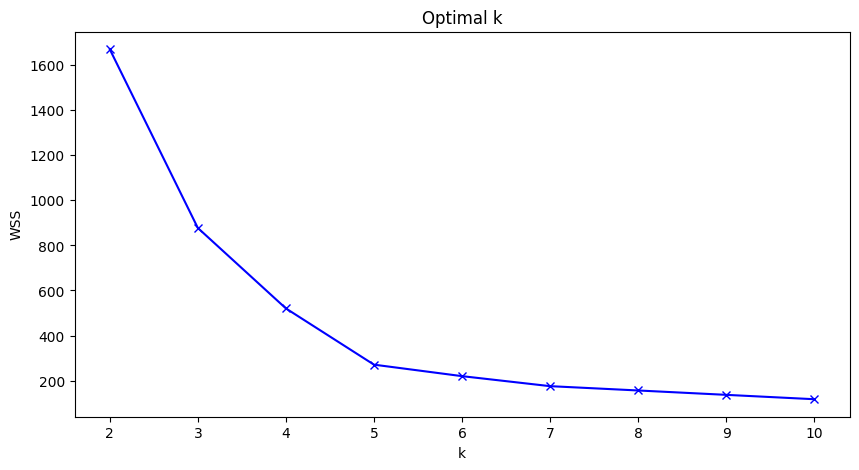

In [27]:
#WSS Plotting
plt.figure(figsize=(10,5))
plt.plot(K_range, wss, 'bx-')
plt.xlabel('k')
plt.ylabel('WSS')
plt.title('Optimal k')
plt.show()

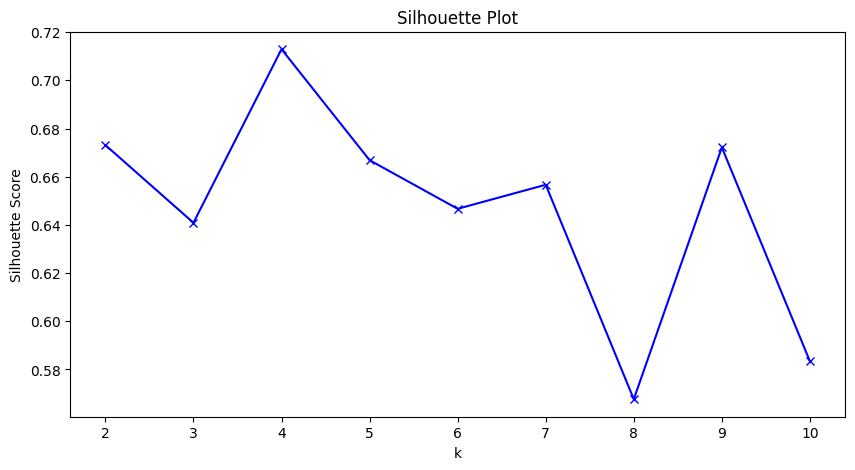

In [28]:
#Silhouette Plot
plt.figure(figsize=(10,5))
plt.plot(K_range, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Plot')
plt.show()

My findings for task 1:

Plotting the WSS and the silhouette score graphs is a good strategy for cluster evaluation. The distinct knee in the WSS at k=4 and the peak in the silhouette score graph at k=4 indicate that the optimal number of clusters for the dataset is 4. The silhouette score peaked at k=4 to approximately 0.71 which indicates that the data points are closer to their cluster central than they are to other cluster centers. The silhouette score ranges -1 to 1, so a score of 0.71 indicates that k=4 is a good choice. Furthermore, the knee in the WSS graph shows that adding more clusters from this point might not capture meaningful distincations in the data. It might only capture noise.
To summarize both the elbow method and the silhouette scores independently pointed towards k=4 as the optimal number of clusters for this data set.


In [29]:
#TASK2
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score
true_labels = df['y'].values
eps_values = [x/10 for x in range(1, 26)] 
min_samples_values = [5, 10, 15, 20]
best_ari = -1
best_eps = None
best_min_samples = None
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        predicted_labels = dbscan.fit_predict(scaled_df)
        ari = adjusted_rand_score(true_labels, predicted_labels)
        if ari > best_ari:
            best_ari = ari
            best_eps = eps
            best_min_samples = min_samples

In [30]:
print(f'Best eps: {best_eps}')
print(f'Best min_samples: {best_min_samples}')
print(f'Best Adjusted Rand Index (ARI): {best_ari}')

Best eps: 0.1
Best min_samples: 5
Best Adjusted Rand Index (ARI): 0.9965358935695121


My findings for task 2:
To figure out which set-up was doing the best job, I looked at the Adjusted Rand Index (ARI) which tells us how close the clusters that DBSCAN came up with are to the actual groups in the data. After running all these different combinations, it turned out that the best epsilon was 0.1, and the best number of minimum samples was 5. The ARI for these parameters was about 0.997 which is considered good. An ARI close to 1 means that our DBSCAN clusters were super close to the real groups in the dataset.

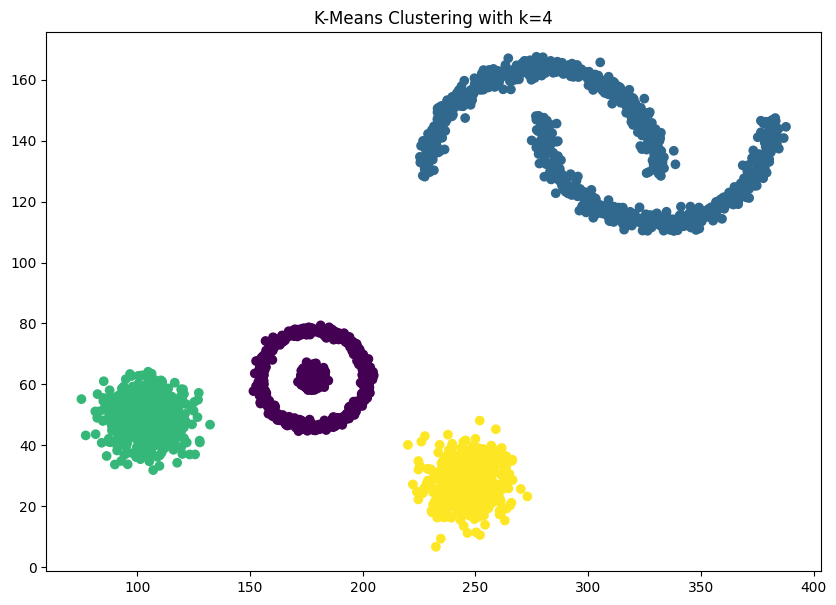

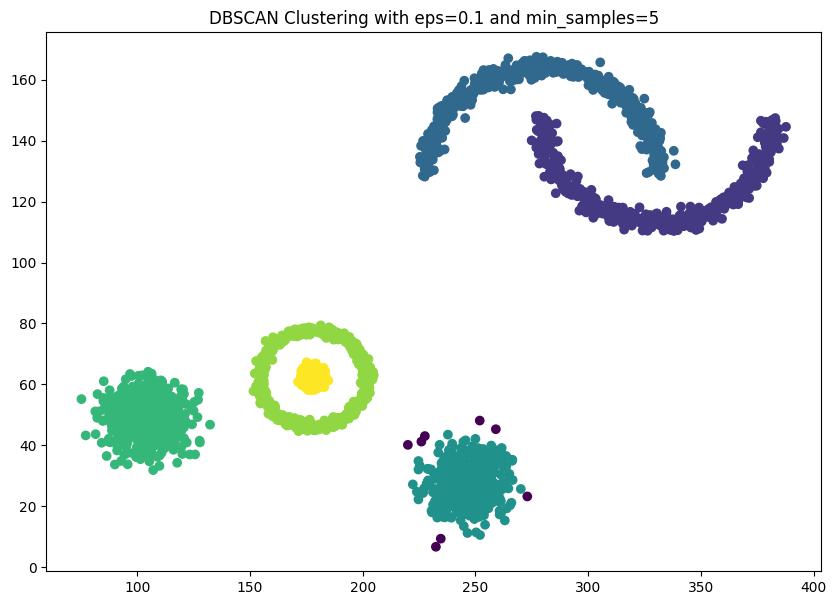

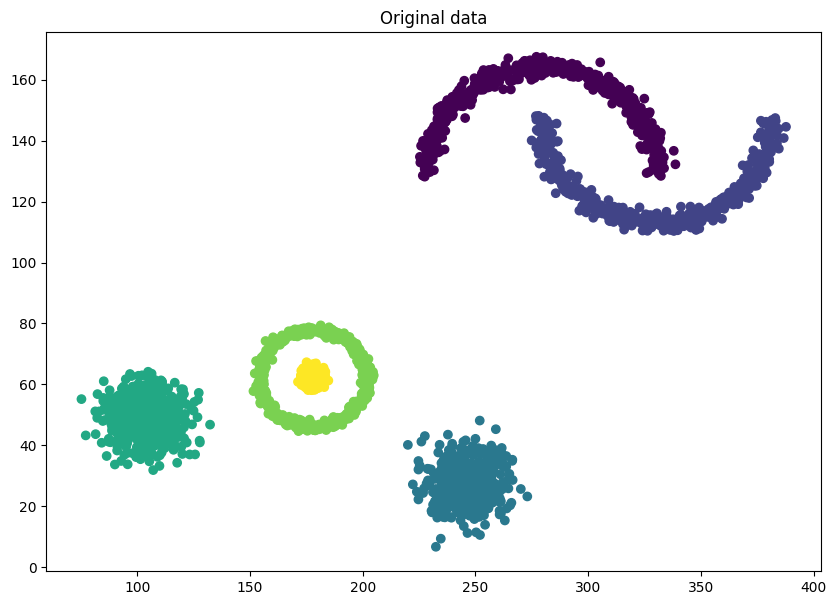

In [31]:
#TASK 3
import matplotlib.pyplot as plt

optimal_k = 4 
best_eps = 0.1 
best_min_samples = 5 
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42).fit(scaled_df)
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples).fit(scaled_df)

plt.figure(figsize=(10, 7))
plt.scatter(df['x0'], df['x1'], c=kmeans.labels_)
plt.title(f'K-Means Clustering with k={optimal_k}')
plt.show()

plt.figure(figsize=(10, 7))
plt.scatter(df['x0'], df['x1'], c=dbscan.labels_)
plt.title(f'DBSCAN Clustering with eps={best_eps} and min_samples={best_min_samples}')
plt.show()

plt.figure(figsize=(10, 7))
plt.scatter(df['x0'], df['x1'], c=df['y'])
plt.title('Original data')
plt.show()

The k results in task 1 and 2 are different. We got 6 clusters in the DBSCAN but only 4 in the K means. This is not strange because we are using two different clustering tecniques. The results of DBSCAN is a set of clusters where each cluster is a dense area in the dataset surrounded by areas with lower point density. With epsilon 0.1, we got 6 clusters. However the K-Means depends on the k value (the number of clusters). As we are using 4, we will naturally only get 4 clusters which is done by calculating the closest centroid to each data point. 
The quality of the DBSCAN is better than the K-means because it matches the original data. However, it considered some of the data points as noise even though they were not outliers in the original data. In my opinion, both clustering algorithms results quality was valid because the K-means was able to capture the same clusters but merged 4 of them. It could be a good result depending on the application. But, it is clear that DBSCAN gave the better result for this kind of data (one with arbitrary shapes). This can be the reason why DBSCAN outperformed K-means; our original data had arbitrary shapes and was not very spherical.